In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Loading data file

In [2]:
telco_customer_churn_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

 ## Check at the top records of data file

In [3]:
telco_customer_churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_customer_churn_data.shape

(7043, 21)

In [30]:
# Shape of the dataset
print(f"Dataset contains {telco_customer_churn_data.shape[0]} rows and {telco_customer_churn_data.shape[1]} columns.")

# Information about the dataset
telco_customer_churn_data.info()


Dataset contains 7043 rows and 21 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16 

In [5]:
telco_customer_churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Convert TotalCharges to numeric, forcing errors to NaN
telco_customer_churn_data['TotalCharges'] = pd.to_numeric(telco_customer_churn_data['TotalCharges'], errors='coerce')

# Check for any missing values after conversion
telco_customer_churn_data.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# Fill missing values with the mean of the column
telco_customer_churn_data['TotalCharges'].fillna(telco_customer_churn_data['TotalCharges'].mean(), inplace=True)
telco_customer_churn_data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
telco_customer_churn_data.dropna(how = 'any', inplace = True)

In [9]:
telco_customer_churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
telco_customer_churn_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [11]:
telco_customer_churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
telco_customer_churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
telco_customer_churn_data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [15]:
telco_customer_churn_data = telco_customer_churn_data.copy()

In [16]:
telco_customer_churn_data ['TotalCharges'] = pd.to_numeric(telco_customer_churn_data ['TotalCharges'], errors='coerce')

# Handle infinite values in the dataset
telco_customer_churn_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values if any
telco_customer_churn_data .dropna(inplace=True)
telco_customer_churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
telco_customer_churn_data.loc[telco_customer_churn_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [18]:
churn_counts = telco_customer_churn_data ['Churn'].value_counts()

# Calculate percentages
churn_percentages = 100 * churn_counts / len(telco_customer_churn_data ['Churn'])

# Display the output
print(churn_percentages)


Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64


In [19]:
telco_customer_churn_data ['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# Distribution of Monthly Charges

C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


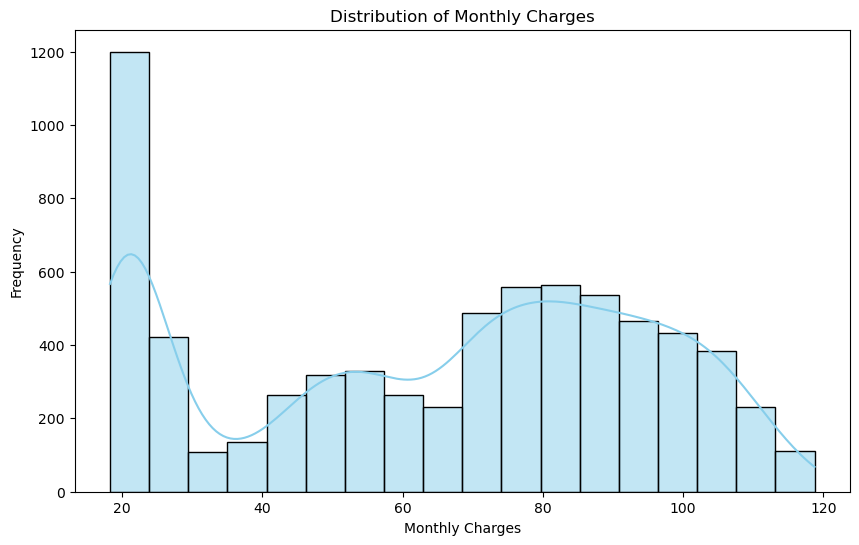

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(telco_customer_churn_data['MonthlyCharges'], kde=True, color='skyblue')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

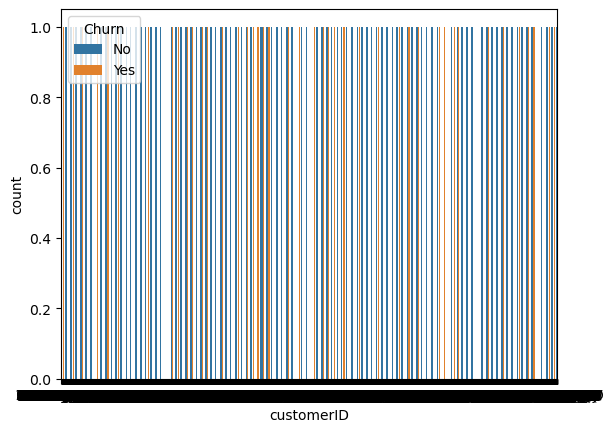

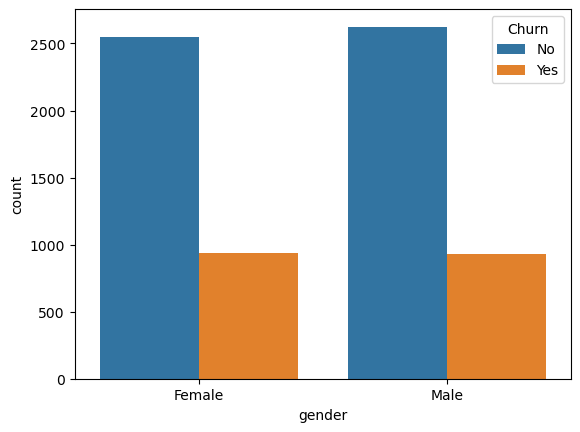

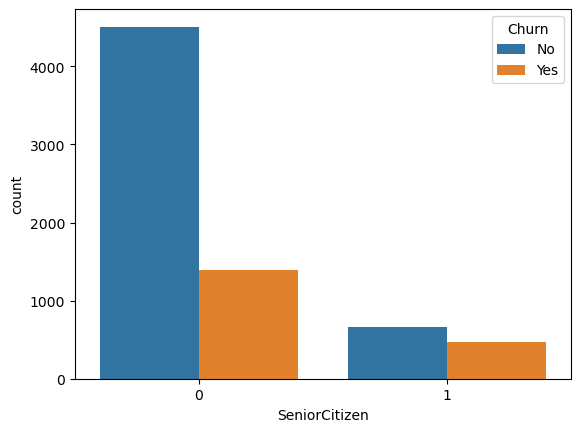

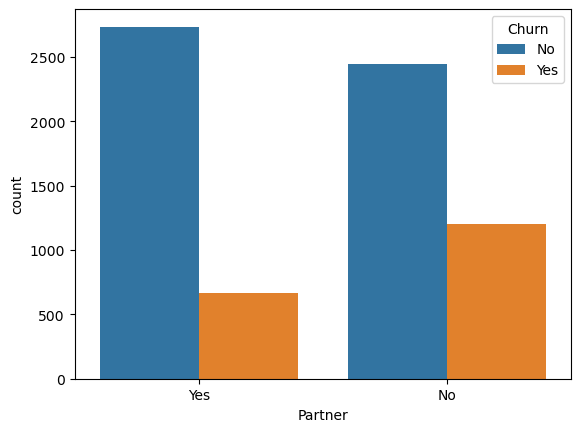

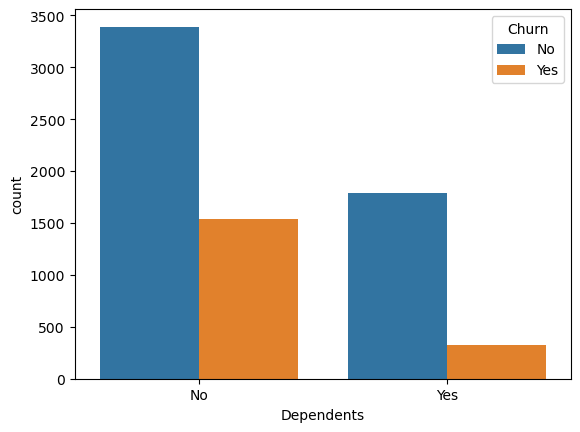

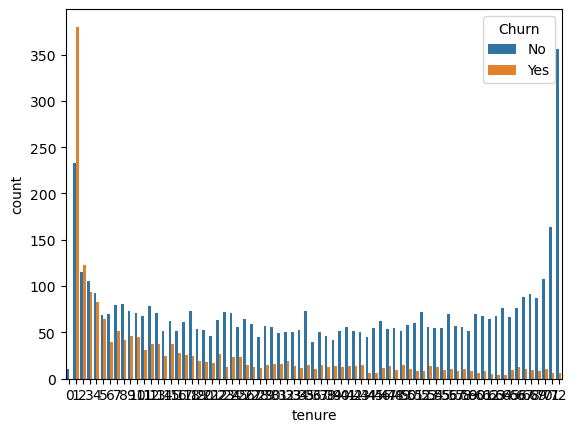

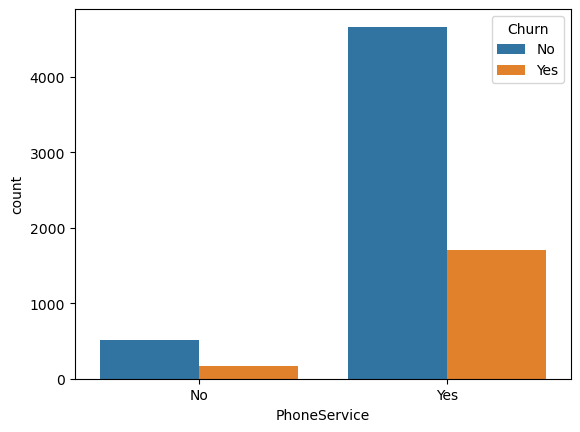

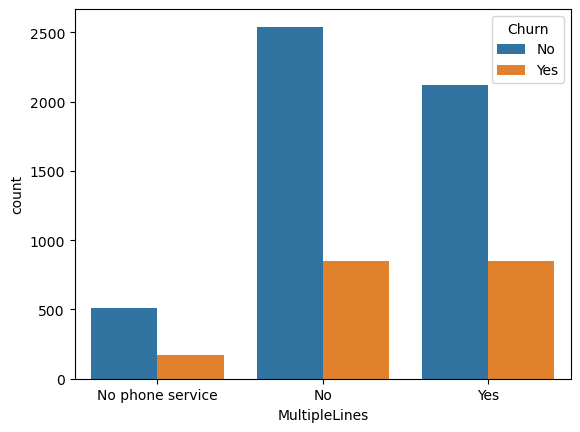

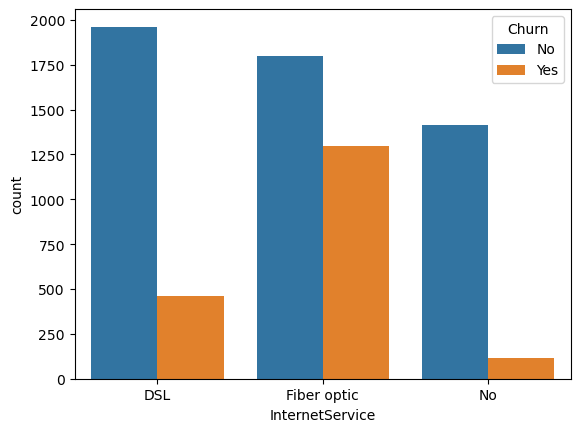

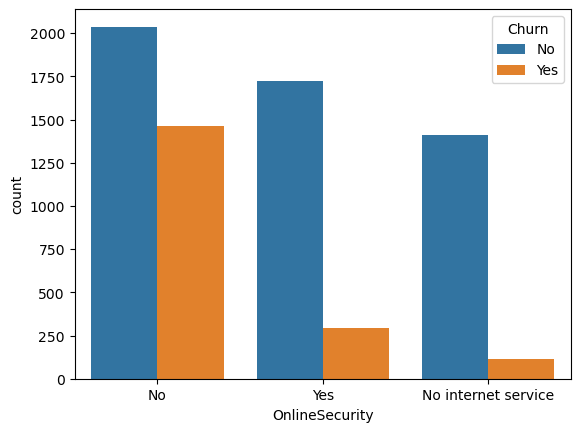

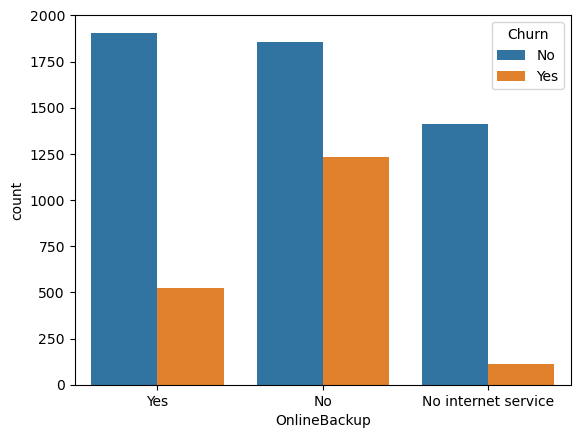

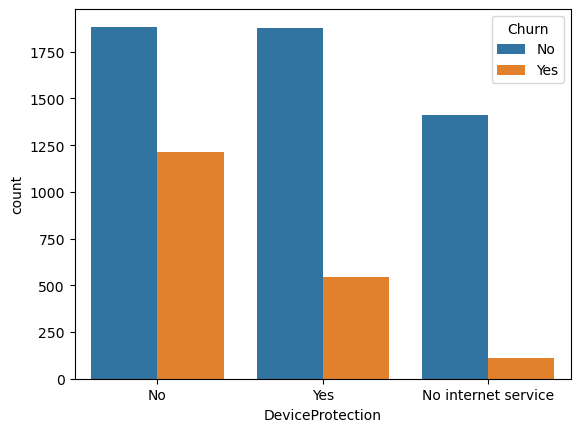

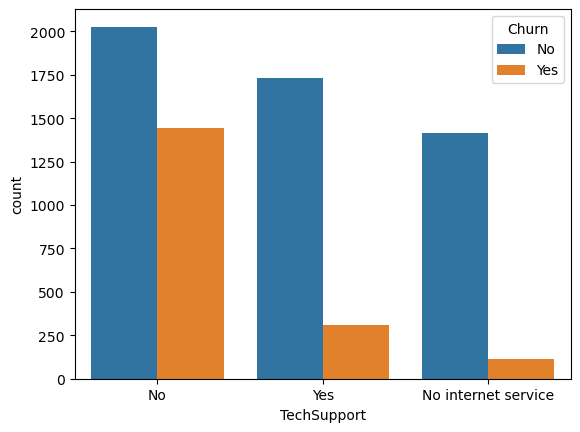

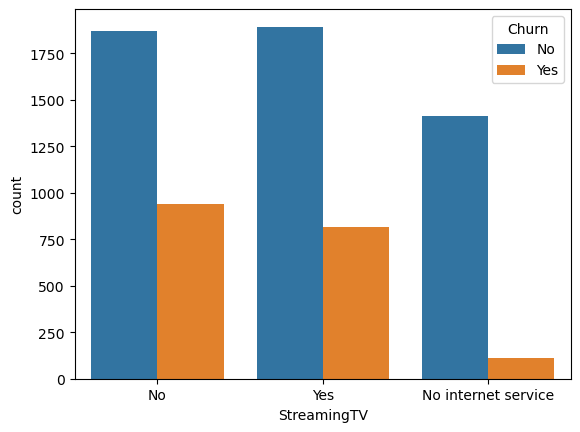

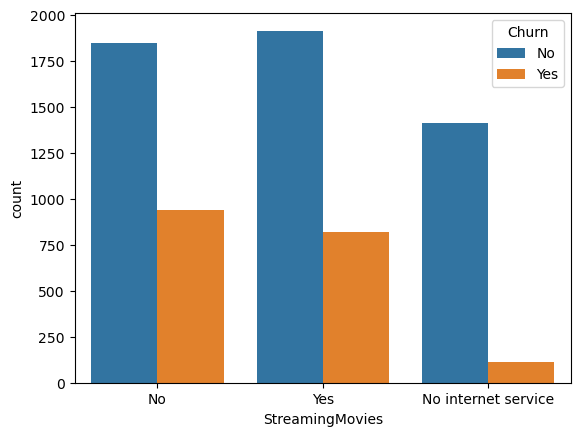

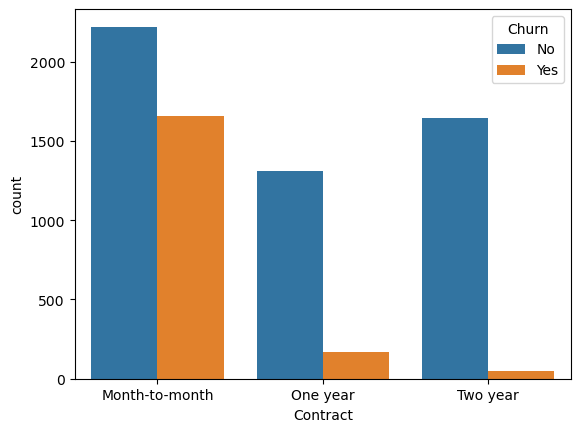

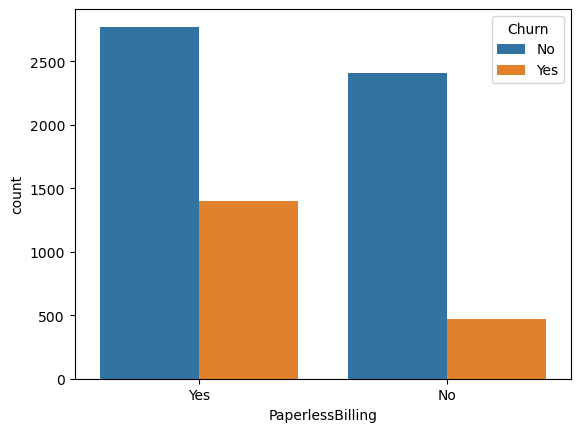

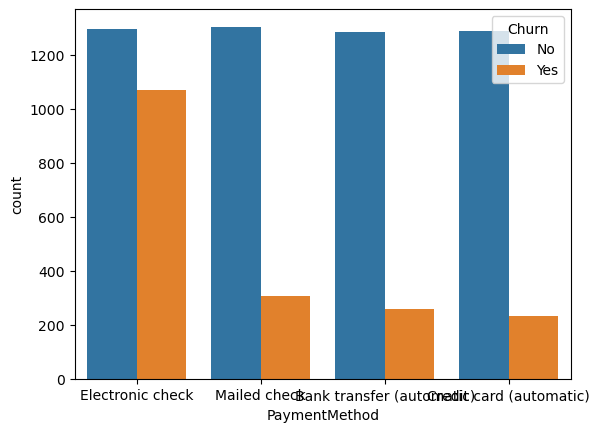

In [46]:
for i, predictor in enumerate(telco_customer_churn_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_customer_churn_data, x=predictor, hue='Churn')

## Bivariate Analysis and Churn Rate Visualization
#### Churn Rate by Gender and Senior Citizen Status
Step 1: Plot Churn Rate by Gender

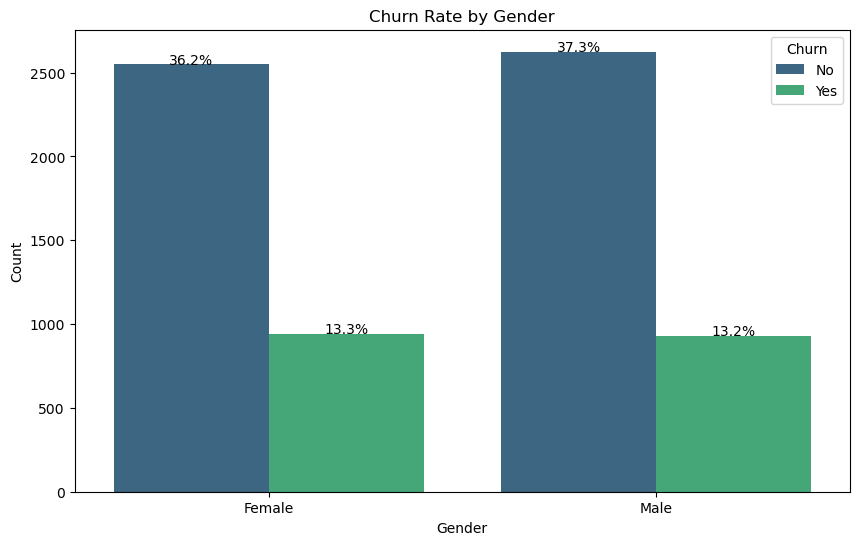

In [21]:
# Plot churn rate by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='Churn', data=telco_customer_churn_data, palette='viridis')

# Add data points and percentages on the plot
total_height = len(telco_customer_churn_data)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:.1%}'.format(height / total_height),
             ha="center")

plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Step 2: Plotting Churn Rate by Senior Citizen Status


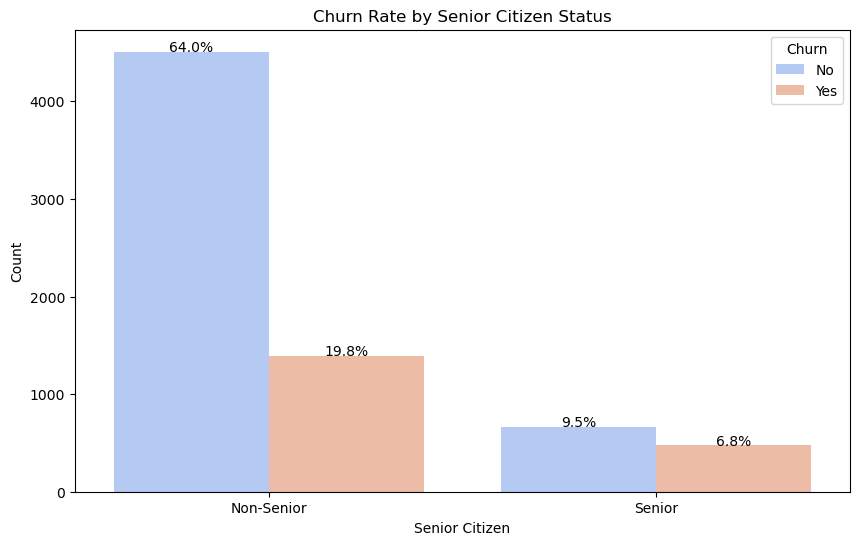

In [22]:
# Plot churn rate by senior citizen status
plt.figure(figsize=(10, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=telco_customer_churn_data, palette='coolwarm')

# Add data points and percentages on the plot
total_height = len(telco_customer_churn_data)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:.1%}'.format(height / total_height),
             ha="center")

plt.title('Churn Rate by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Senior', 'Senior'])
plt.show()

Step 3: Churn Rate by Gender and Senior Citizen Status

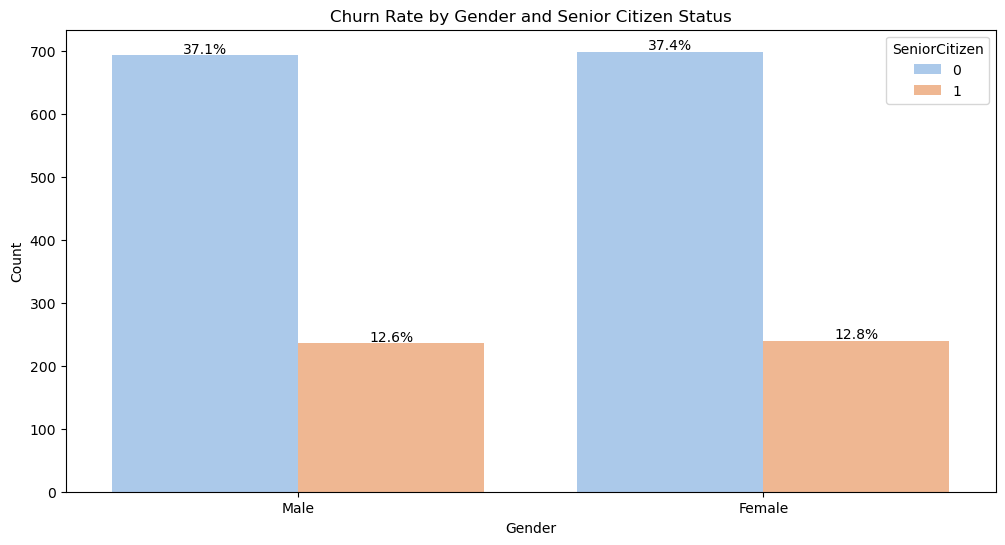

In [23]:
# Plot churn rate by gender and senior citizen status
# Convert 'SeniorCitizen' column to string data type
telco_customer_churn_data['SeniorCitizen'] = telco_customer_churn_data['SeniorCitizen'].astype(str)

# Plot churn rate by gender and senior citizen status
plt.figure(figsize=(12, 6))
sns.countplot(x='gender', hue='SeniorCitizen', data=telco_customer_churn_data[telco_customer_churn_data['Churn'] == 'Yes'], palette='pastel')

# Add data points and percentages on the plot
total_height = len(telco_customer_churn_data[telco_customer_churn_data['Churn'] == 'Yes'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:.1%}'.format(height / total_height),
             ha="center")

plt.title('Churn Rate by Gender and Senior Citizen Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [42]:
# Calculate churn rates by group
churn_by_group = telco_customer_churn_data.groupby(['gender', 'SeniorCitizen'])['Churn'].value_counts(normalize=True).unstack().fillna(0)['Yes']

# Prepare data for pie chart
churn_labels = ['Female Non-Senior', 'Female Senior', 'Male Non-Senior', 'Male Senior']
churn_sizes = [churn_by_group['Female', 0], churn_by_group['Female', 1], churn_by_group['Male', 0], churn_by_group['Male', 1]]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_sizes, labels=churn_labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Churn Rate by Gender and Senior Citizen Status')
plt.show()


KeyError: 'Yes'

In [25]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN
telco_customer_churn_data['TotalCharges'] = pd.to_numeric(telco_customer_churn_data['TotalCharges'], errors='coerce')

# Convert 'Churn' to binary
telco_customer_churn_data['Churn'] = np.where(telco_customer_churn_data.Churn == 'Yes', 1, 0)

# Handle infinite values and drop rows with NaN values
telco_customer_churn_data.replace([np.inf, -np.inf], np.nan, inplace=True)
telco_customer_churn_data.dropna(inplace=True)

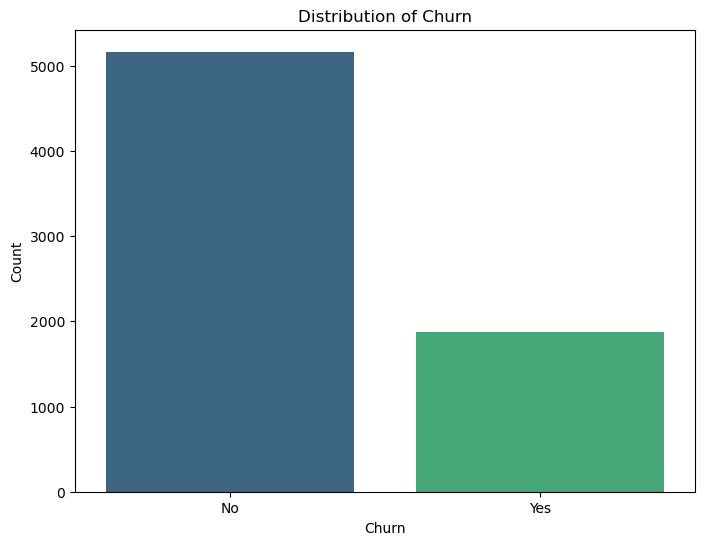

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=telco_customer_churn_data, palette='viridis')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [26]:
telco_customer_churn_data_dummy = pd.get_dummies(telco_customer_churn_data)
telco_customer_churn_data_dummy.head()

,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
1,34,56.95,1889.50,0,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
2,2,53.85,108.15,1,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
3,45,42.30,1840.75,0,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
4,2,70.70,151.65,1,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False


C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


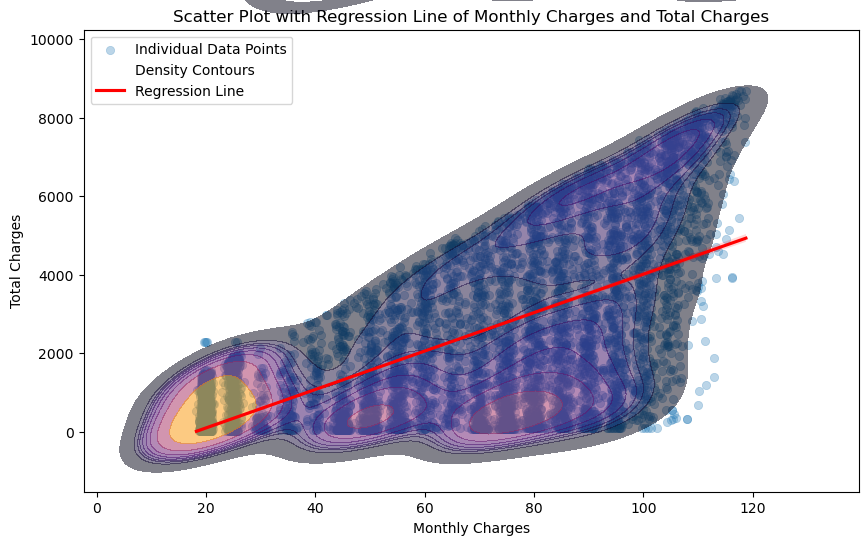

In [27]:
# Plot scatter plot with regression line and density contours
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=telco_customer_churn_data_dummy, alpha=0.3, edgecolor=None, label='Individual Data Points')
sns.kdeplot(x='MonthlyCharges', y='TotalCharges', data=telco_customer_churn_data_dummy, cmap='inferno', fill=True, alpha=0.5, label='Density Contours')
sns.regplot(x='MonthlyCharges', y='TotalCharges', data=telco_customer_churn_data_dummy, scatter=False, color='red', label='Regression Line')
plt.title('Scatter Plot with Regression Line of Monthly Charges and Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend()
plt.show()


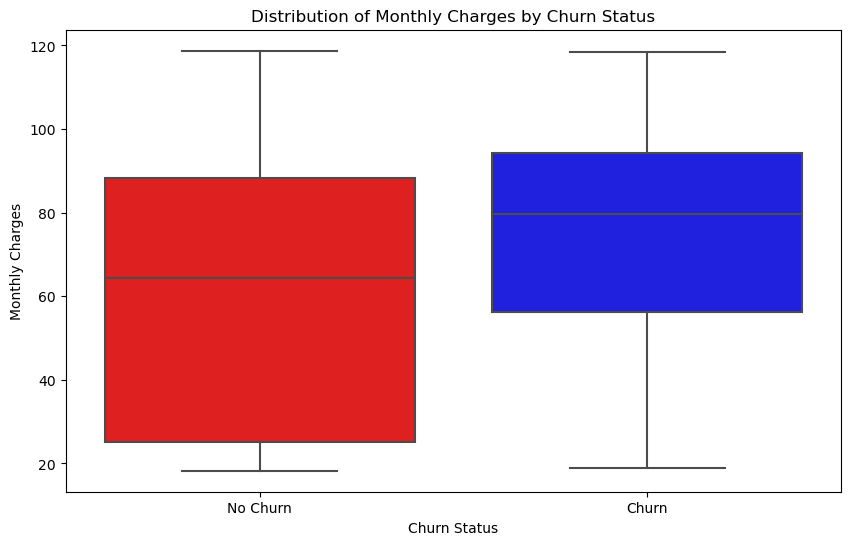

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=telco_customer_churn_data_dummy, 
            palette=["Red", "Blue"])  # Specify colors directly
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges')
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()


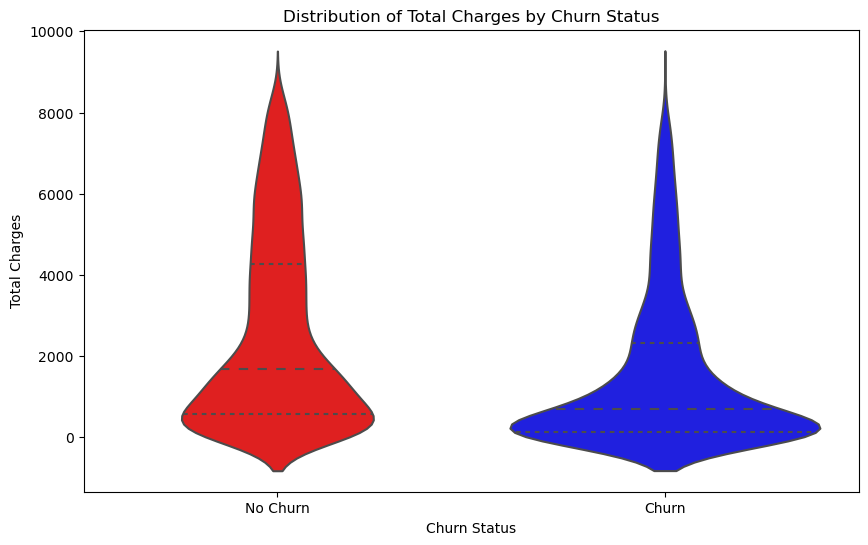

In [29]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='TotalCharges', data=telco_customer_churn_data_dummy, 
               palette=["Red", "Blue"], inner="quartile")  # Specify colors directly
plt.xlabel('Churn Status')
plt.ylabel('Total Charges')
plt.title('Distribution of Total Charges by Churn Status')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()


C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dines\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and 

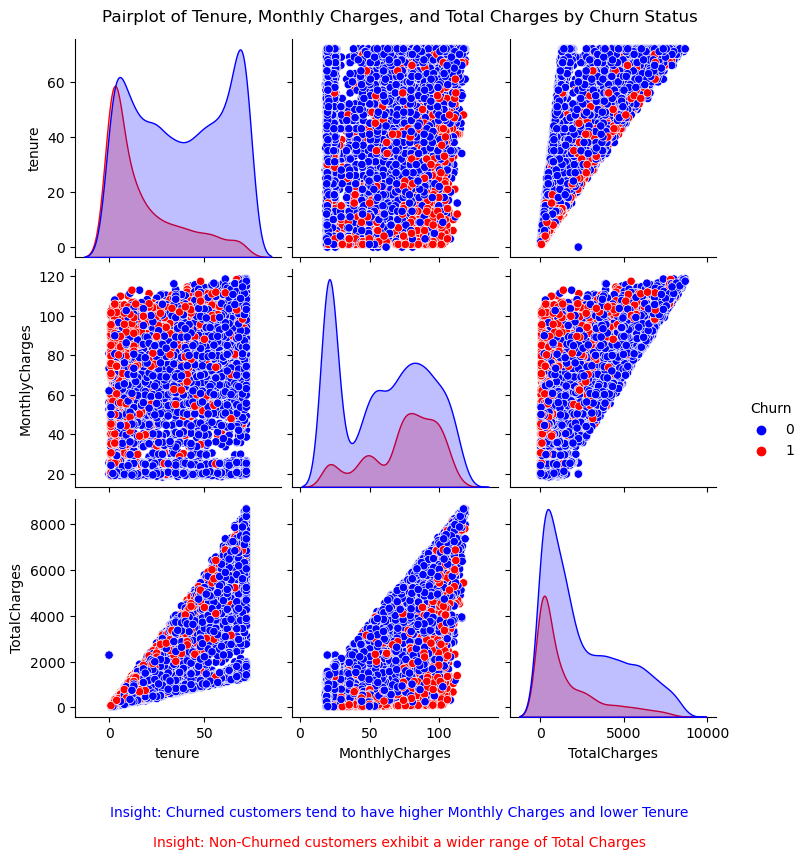

In [30]:
# Convert 'Churn' to categorical data type
telco_customer_churn_data_dummy['Churn'] = telco_customer_churn_data_dummy['Churn'].astype('category')

# Plot pairplot with specified palette colors
grid = sns.pairplot(telco_customer_churn_data_dummy, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn', palette=["blue", "red"])

# Add annotations for insights below the pairplot
plt.text(0.5, -0.05, "Insight: Churned customers tend to have higher Monthly Charges and lower Tenure", ha='center', va='center', transform=grid.fig.transFigure, fontsize=10, color='blue')
plt.text(0.5, -0.09, "Insight: Non-Churned customers exhibit a wider range of Total Charges", ha='center', va='center', transform=grid.fig.transFigure, fontsize=10, color='red')

# Add title above the pairplot
grid.fig.suptitle('Pairplot of Tenure, Monthly Charges, and Total Charges by Churn Status', y=1.02)

plt.show()


In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_customer_churn_data_dummy.corr(), cmap="Paired")

In [31]:
telco_customer_churn_data_dummy.to_csv('telco_churn_cleaned.csv')